# **Trabalhando com os dados de uma tabela**

In [1]:
import pandas as pd
import seaborn as sns


dados = pd.read_csv("tips.csv")
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


**Traduzindo nomes das series no dataframe**

In [2]:
renomear = {
    "total_bill": "valor_da_conta",
    "tip": "gorjeta",
    "dessert": "sobremesa",
    "day" : "dia_da_semana",
    "time": "hora_do_dia",
    "size": "tota_de_pessoas"
}

gorjetas = dados.rename(columns = renomear)
#renomeando coluna das gorjetas
sim_nao = {"No": "Não", "Yes": "Sim"}
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

#renomeando dias da semana

dias = {
    "Sun" : "Domingo",
    "Sat" : "Sábado",
    "Thur" : "Quinta",
    "Fri" : "Sexta"
}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

#renomeando hora_do_dia

horas = {
    "Dinner" : "Jantar",
    "Lunch" : "Almoço"
}

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(horas)

# **Trabalhando com dados pelo SeaBorn**

**Analisando valor da conta e gorjeta**

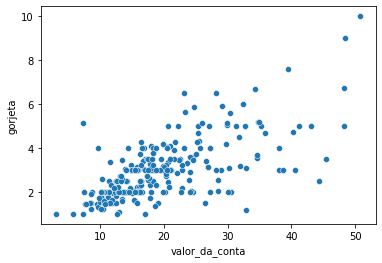

In [3]:
valor_gorjeta = sns.scatterplot(x="valor_da_conta", y = "gorjeta", data=gorjetas)

Visualmente, percebemos que o valor da gorjeta(variável respota) aumenta com o valor da conta(variável explicativa)

In [4]:
print("A base de dados possui {} registros!".format(gorjetas.shape[0]))
print("Registros não nulos : ")

gorjetas.count()

A base de dados possui 244 registros!
Registros não nulos : 


valor_da_conta     244
gorjeta            244
sobremesa          244
dia_da_semana      244
hora_do_dia        244
tota_de_pessoas    244
dtype: int64

**Criando novo campo porcentagem**

In [5]:
gorjetas["porcentagem"] = (gorjetas["gorjeta"] / gorjetas["valor_da_conta"])


gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,tota_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


**Verificando relação entre valor da conta e porcentagem**

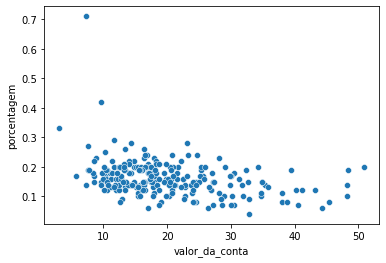

In [6]:
porcentagem_conta = sns.scatterplot(x="valor_da_conta", y = "porcentagem", data=gorjetas)

Visualmente, com o aumento do valor da conta, a porcentagem da gorjeta não é proporcional

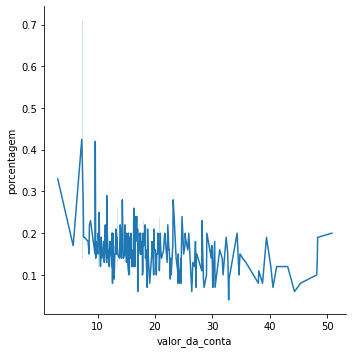

In [7]:
porcentagem_conta_linha = sns.relplot(x="valor_da_conta", y = "porcentagem", data= gorjetas,kind="line")

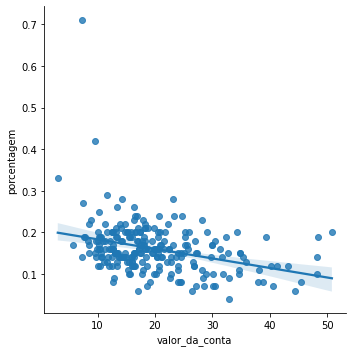

In [8]:
sns.lmplot(x="valor_da_conta", y = "porcentagem", data=gorjetas)

**Analisando a varíavel sobremesa**

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,tota_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [10]:
gorjetas[gorjetas.sobremesa=="Sim"].describe()


,valor_da_conta,gorjeta,tota_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [11]:
gorjetas[gorjetas.sobremesa=="Não"].describe()


,valor_da_conta,gorjeta,tota_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


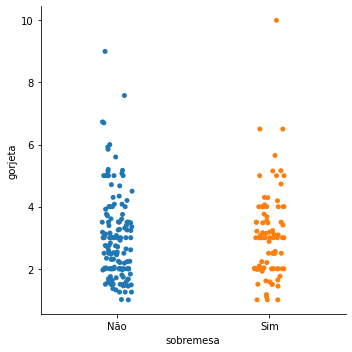

In [12]:
sns.catplot(x="sobremesa",y="gorjeta", data=gorjetas)

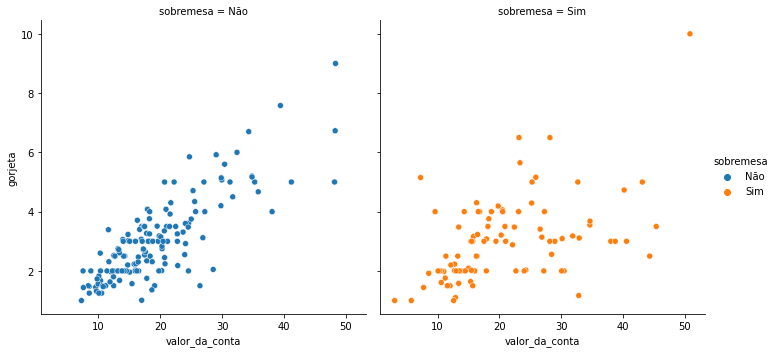

In [13]:
sns.relplot(x="valor_da_conta",y="gorjeta", hue="sobremesa",col="sobremesa",data=gorjetas)

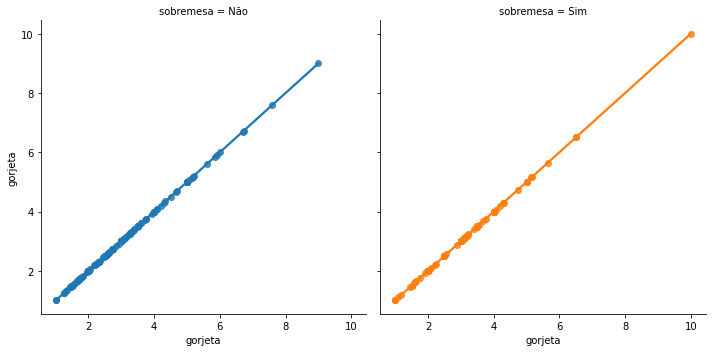

In [14]:
sns.lmplot(x="gorjeta", y="gorjeta" , col="sobremesa",hue="sobremesa",data=gorjetas)

Visualmente, existe uma diferença do valor da gorjeta daqueles que não pediram sobremesa

**Teste de hipótese:**
A distribuição da taxa da gorjeta é a mesma em dois grupos

A distribuição da taxa da gorjeta não é a mesma em dois grupos

In [15]:
from scipy.stats import ranksums

sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

r = ranksums(sobremesa,sem_sobremesa)

print("O valor de pvalue é {}".format(r.pvalue))

O valor de pvalue é 0.5266635660124415


Percebemos que a taxa entre  é a mesma entre os dois grupos

**Analise dos dias da semana em relação a gorjeta**

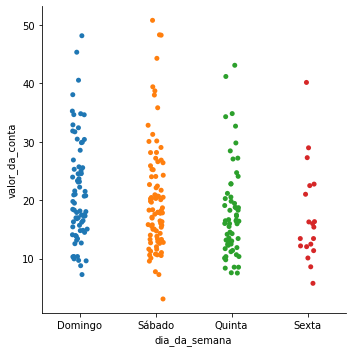

In [16]:
sns.catplot(x="dia_da_semana", y="valor_da_conta", data=gorjetas)

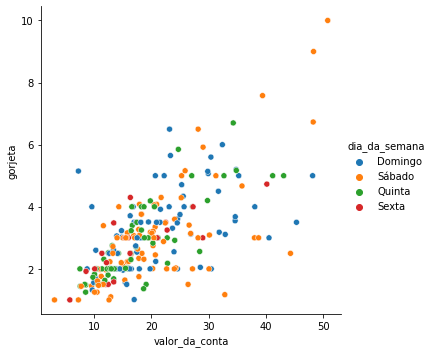

In [17]:
sns.relplot(x="valor_da_conta", y="gorjeta", hue="dia_da_semana",data=gorjetas)

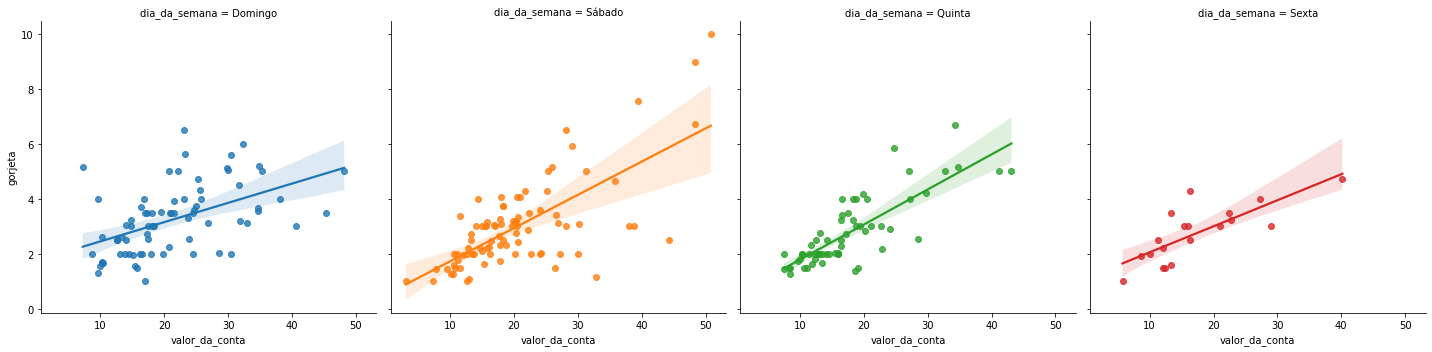

In [18]:
sns.lmplot(x="valor_da_conta", y="gorjeta",hue="dia_da_semana", col="dia_da_semana",data =gorjetas)

In [19]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print("A média geral das gorjetas é de {}".format(media_geral_gorjetas))

A média geral das gorjetas é de 2.99827868852459


In [20]:
gorjetas.groupby(["dia_da_semana"]).mean()[["valor_da_conta", "gorjeta","porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [21]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

**Teste de hipótese:**
A distribuição do valor da conta é igual no sabádo e no domingo

A distribuição do valor não é igual no sabádo e no domingo


In [22]:
valor_conta_domingo = gorjetas.query("dia_da_semana =='Domingo'")
valor_conta_sabado = gorjetas.query("dia_da_semana =='Sábado'")

r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print("O valor do pvalue é {}".format(r2.pvalue))

O valor do pvalue é [3.57672848e-01 2.95848179e-02 1.04723775e-02 3.91644496e-28
 1.00000000e+00 7.08635547e-02 4.78592251e-01]


A distribuição do valor da conta é igual no sabádo e no domingo

**Hora do dia**

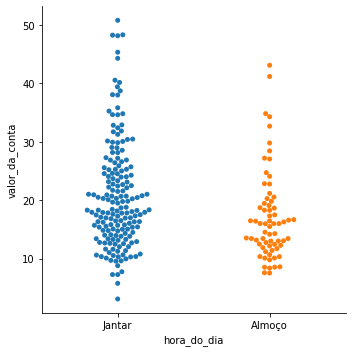

In [26]:
sns.catplot(x="hora_do_dia" , y="valor_da_conta",data=gorjetas,kind="swarm")

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

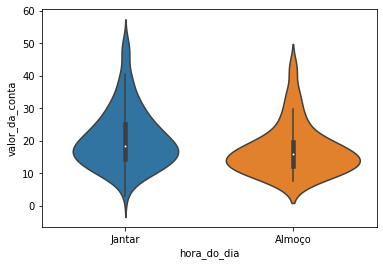

In [28]:
sns.violinplot(x="hora_do_dia",y="valor_da_conta",data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

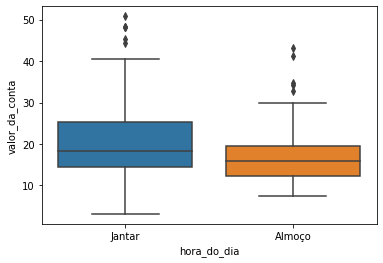

In [32]:
sns.boxplot(x="hora_do_dia", y ="valor_da_conta",data=gorjetas)

In [35]:
gorjetas.groupby(["hora_do_dia"]).mean()[["valor_da_conta","gorjeta","porcentagem"]]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**Teste de hipótese:**
A distribuição do valor da conta é igual no jantar e no almoço

A distribuição do valor não é igual no jantar e no almoço

A distribuição do valor da conta é maior na hora da janta do que no almoço.